In [2]:
#importing data into jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")
data.head()

#General information about the dataset
number_of_rows=data.shape[0]
number_of_columns=data.shape[1]
print(number_of_rows)
print(number_of_columns)

6704
9


This dataset has 9 columns and 6704 rows

In [43]:
#SORTING THE DATA
#Formatting the headings of the variables to snake case heading
data.columns=data.columns.str.lower()


In [8]:
#DATA CLEANING
#checking for missing values
data.isnull()
#There are no missing values

#FORMATTING WRONG DATA
data["education_level"]=data["education_level"].replace("Bachelor's","Bachelor's Degree")
data["education_level"]=data["education_level"].replace("Master's","Master's Degree")
data["education_level"]=data["education_level"].replace("phD","PhD")

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
#Filtering out the data to keep only rows with gender as male or female

data=data[data["gender"].isin(["Male","Female"])]

#mean salary earned by each gender
gender_group = data.groupby('gender')
mean_salary_by_gender = gender_group['salary'].mean()
print(mean_salary_by_gender)

gender
Female    107888.998672
Male      121389.870915
Name: salary, dtype: float64


On average,males earn a higher salry compared to females.

In [9]:
#Calculating the maximum and minimum salaries earned for each education level
new_group= data.groupby("education_level")
min_salaries = new_group["salary"].min()
max_salaries = new_group["salary"].max()

print("\nMinimum salary per education level:")
print(min_salaries)
print("\nMax salary per education level:")
print(max_salaries)


Minimum salary per education level:
education_level
Bachelor's Degree      350.0
High School          25000.0
Master's Degree      32000.0
PhD                    579.0
Name: salary, dtype: float64

Max salary per education level:
education_level
Bachelor's Degree    250000.0
High School          166109.0
Master's Degree      228000.0
PhD                  250000.0
Name: salary, dtype: float64


The maximum salary for individuals with a PHD and Bachelor's Degree is $250000 while those with a high school diploma earn a maximum salary of $166109.This indicates that as the level of education increases,so does the salary earned.


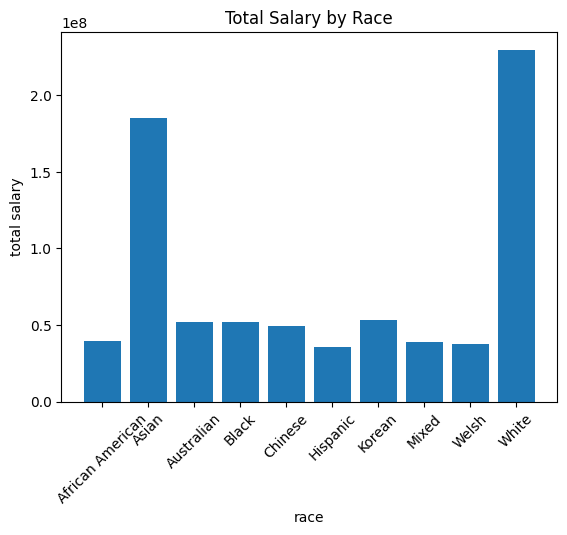

In [18]:
#DATA VISUALIZATION
#Calculating the total salary earned for each race
grouped_data=data.groupby("race")["salary"].sum()

#Visualizing the data
plt.bar(grouped_data.index,grouped_data.values)
plt.xlabel("race")
plt.ylabel("total salary")
plt.title("Total Salary by Race")

plt.xticks(rotation=45)               
plt.show()


The bar graph above indicates that Whites are high income earners,followed by Asians.
African American,the Hispanics,mixed race and the Welsh are low income earners.

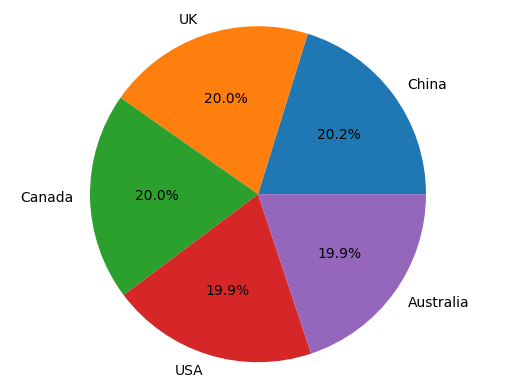

In [13]:
#PIE CHART SHOWING THE PERCENTAGE OF SALARY EARNED BY EACH COUNTRY
import matplotlib.pyplot as plt
grouped_data=data.groupby("country")["salary"].sum().reset_index()

#Calculating the percentage
total_salary=grouped_data["salary"].sum()
grouped_data["percentage"]=(grouped_data["salary"]/total_salary)*100

#sorting the data by percentage
grouped_data=grouped_data.sort_values("percentage",ascending=False)

#Creating the Pie Chart
plt.pie(grouped_data["percentage"],
labels=grouped_data["country"],
autopct="%1.1f%%")
plt.axis("equal")
plt.show()


The pie chart as shown above indicates that the pay scales in different countries are approximately equal.

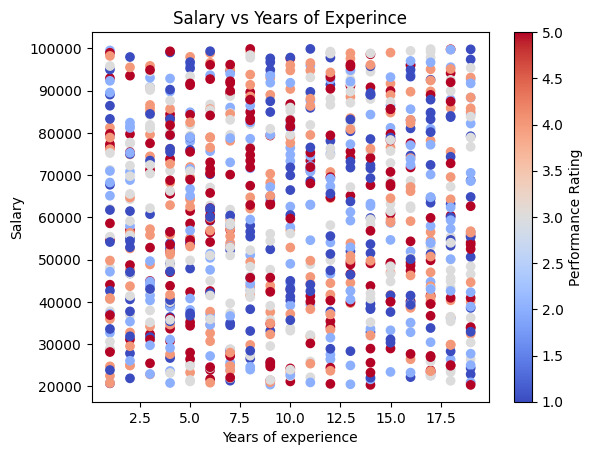

In [4]:
#USING A SCATTERPLOT TO VISUALIZE THE RELATIONSHIP BETWEEN SALARY AND YEARS OF EXPERIENCE
#Generating random data for years of experience and salary
# (displaying all the data points on a scatter plot may result in overplotting)
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
years_of_experience=np.random.randint(1,20,size=1000)
salary=np.random.randint(20000,100000,size=1000)
performance_rating=np.random.randint(1,6,size=1000)

plt.scatter(years_of_experience,salary,c=performance_rating,cmap="coolwarm")

#Adding color bar
cbar=plt.colorbar()
cbar.set_label("Performance Rating")

plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experince")

plt.show()






Based on the scatterplot as shown above:
    1.The scatter plot shows individual data points scattered across the plot,this means that there is variability in salaries at each level of exeprience.
    some individuals with the same years of experince may have higher or lower salaries compared to others,which indicates that other factors,other than years of experience might also influence salary earned.

    2.There is a positive relationship between salary earned and years of experience.That is ,individuals with more experience, tend to earn higher salaries.This also suggests that there is a correlation between salary and years of experience.
    (The scatter plot incorporates a color mapping that represents performanec rating.The color of each data point shows the performance rating of individuals with respect to their salary and years of experience.)


In [4]:
#USING A Bar PLOT TO VISUALIZE THE MEDIAN AGE IN RELATION TO SALARY
import plotly.graph_objects as go
import pandas as pd

#Grouping the data using mean(salary by age) for easy readability
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")
salary_by_age=data.groupby("age")["salary"].mean().reset_index()

#Creating the bar plot
fig=go.Figure(data=go.Bar(x=salary_by_age["age"],
    y=salary_by_age["salary"]))

fig.update_layout(xaxis_title="age",
yaxis_title="salary",title="salary by age")

fig.show()


Based on the bar plot,it can be observed that older individussls tend to earn the highest average salary of $200000.
There is a positive correlation between age and salary.As age increased,the average salary also tends to increase.

In [5]:
#HYPOTHESES TESTING
# Performing Analysis of Variance (one way ANOVA)to determine if there is significant salary differences based on gender
import pandas as pd
from scipy import stats
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")

#PERFOMING THE ONE WAY ANOVA
result=stats.f_oneway(data[data["gender"]=="Male"]["salary"],
data[data["gender"]=="Female"]["salary"]                     )

alpha=0.05 #(significance level)
 
 #Checking if p.value is lower than the significance level
if result.pvalue<alpha:
    print("There is a significant salary difference based on gender.")
else:
    print("There is no significant salary difference based on gender")
                

There is no significant salary difference based on gender


The result from ANOVA test means that the observed salary difference between genders in the dataset are not statistically signficant,meaning that any observed salary difference could be due to random chance and the data does not provide enough evidence to support the presence of a statistically significant difference.

In [8]:
#Performing Analysis of Variance (one way ANOVA)to determine if there is significant salary differences based on education level
import pandas as pd
from scipy import stats
data=pd.read_csv("Salary_Data_Based_country_and_race.csv")

education_level=data["education_level"].unique()
groups=[]
for level in education_level:
    groups.append(data[data["education_level"]==level]["salary"])  
  
#PERFORMING THE ANOVA
f_value,p_value=stats.f_oneway(*groups)

alpha=0.05 #(significance level)
if p_value<alpha:
    print("Reject the null hypothesis")
    print("There are significant salary differences based on education level")
else:
    print("Fail to reject the null hypothesis")
    print("There are no significant salary differences based on education level")



Fail to reject the null hypothesis
There are no significant salary differences based on education level


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


The P.value obtained from the ANOVA test suggests that there is no significant  evidence to conclude that there are salary differences based on education level.
This therefore means that  other factors not considered in the analysis affect the salary differences based on education level.

In [13]:
#REGRESSION ANALYSIS
#BUILDING REGRESSION MODELS TO  EXPLORE THE RELATIONSHIP BETWEEN SALARY AND  INDEPENDENT VARIABLES
#Exploring the relationship between salary and years of experience
#Simple linear regression analysis
import pandas as pd
import statsmodels.api as sm

data=pd.read_csv("Salary_Data_Based_country_and_race.csv")

#Checking for missing values in the two columns and dropping rows with missing values
                
data=data.dropna(subset=["years_of_experience","salary"])

 # let X represent Independent variable
X = data["years_of_experience"]  
#let y represent dependent variable
y = data["salary"] 
 
 # Add a constant term for the intercept          
X = sm.add_constant(X)        

#Creating an instance of the OLS (Ordinary Least Squares) model:
model = sm.OLS(y, X)

#Fitting the model to the data:
results = model.fit()

#this will show a summary of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:24:35   Log-Likelihood:                -78791.
No. Observations:                6699   AIC:                         1.576e+05
Df Residuals:                    6697   BIC:                         1.576e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.828e+04    

The OLS regression results shows the coefficients, significance levels, and other statistics related to the relationship between the dependent variable (salary) and the independent variable (years of experience).
R-squared(0.654) and Adjusted R-squared(0.654):
       R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables. In this case, an R-squared of 0.654 means that approximately 65.4% of the variability in salary can be explained by the linear relationship with years of experience. Adjusted R-squared takes into account the number of predictors in the model.

F-statistic( 1.268e+04) and   Prob F-statistic(0.00): 
       The F-statistic tests the overall significance of the regression model. In this output, the F-statistic is quite large, indicating that the model is statistically significant. The Prob (F-statistic) value is the p-value associated with the F-statistic,the prob F-statistisc for this linear regression is 0.00 meaning the model is significant. 

The Coefficient given is(7046.7683),standard error is (62.573),t-statistics,t is(112.617),P.value is (0.000) and the confidence interval for this model is ([6924.106, 7169.431]).

The values shown above mean that the coefficient for years_of_experience represents the estimated increase in salary associated with a one-year increase in experience.That is, for each additional year of experience, the model predicts an average increase of approximately $7046.77 in salary.


Null Hypothesis (H0):There is no actual relationship between the independent variable (Years of experience) and the dependent variable (salary). 
Alternative Hypothesis(Ha):There is a real relationship between the variables, and any observed correlation is not just due to chance.
      In this context,if the p.value is smaller than a predetermined significance level, often 0.05,we reject the null hypothesis.

       The P.value of this model is  0.000 which is less than 0.05.This,therefore ,means that there is a rela relationship between
       an increase in years of experience and an increase in salary in the given dataset and that the relationship is statistically significant.


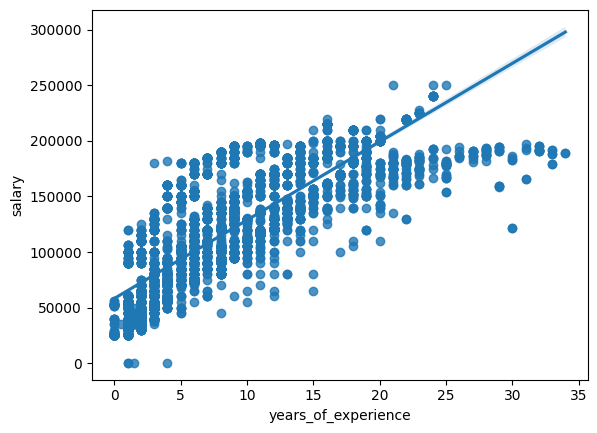

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#scatterplot with the regression line
sns.regplot(x="years_of_experience",y="salary",data=data)

plt.show()





 
 The horizontal spread along the x-axis represents the years of experience, while the vertical spread along the y-axis represents the range of salaries.

Regression Line:
     The regression line shows a positive asssociation between salary and years of experience,that is,as years of experience increase ,so does the individual's salary

Slope of the Regression Line:
       The regression line shows that there is a  strong linear relationship between salary and years of experience.That is ,salary iincreases with one-unit increase in education.


In summary;
The slope of the regression line provides a quantifiable measure of the change in salary for a unit change in education. 
However,this linear regression model only considers the relationship between salary and years of experience.Therefore,other factors not included in the model do contribute to variations in salary hence the presence of outliers in the data.

